In [1]:
import matplotlib.pyplot as plt

import numpy as np
import ROOT, uproot
#root_numpy
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


# import necessary keras modules/functions
import keras
from keras.models import Sequential, Model
from keras.layers import Input, Flatten, Dense, Dropout, MaxPooling2D
from keras.layers import BatchNormalization, Activation, AveragePooling2D, Concatenate
from keras import regularizers
from utils import PlotLearning

Welcome to JupyROOT 6.18/00


Using TensorFlow backend.


In [2]:
events = uproot.open("../FlatTree_Production/Z_Candidates_100k.root")["candidateTree"]
events.keys()

['nRecLep',
 'recLepPt1',
 'recLepEta1',
 'recLepPhi1',
 'recLepIsoVar1',
 'recLepCharge1',
 'recLepPDGID1',
 'recLepPt2',
 'recLepEta2',
 'recLepPhi2',
 'recLepIsoVar2',
 'recLepCharge2',
 'recLepPDGID2',
 'recLepInvMass',
 'genLepInvMass']

In [3]:
data = events.arrays(events.keys())

array = []
for i in events.keys():
    array.append(events.array(i))

array = np.array(array)

In [4]:
data = array.T
nBins=20
kappa=8
nvar=14
massMin=50
massMax=130
Z_mass=91.1876
epochs=50;
#[list(i) for i in root_numpy.tree2array(outTree, start=0, stop = n_events)]

binwidth = ((massMax-massMin)/nBins)
bins = np.array(range(massMin, massMax+binwidth, binwidth))
#print(bins)
x = np.array([i[:-1] for i in data])
xNew = []
y = np.array([i[-1] for i in data])
yNew = []
for i in range(len(y)): 
    migVec = np.searchsorted(bins, y[i]) - np.searchsorted(bins, x[i][-1])
    if abs(migVec)<2 : 
        xNew.append(x[i])
        yNew.append(migVec)
    
ycat = keras.utils.to_categorical(yNew, np.amax(yNew)-np.amin(yNew)+1)
xNew = preprocessing.scale(xNew)
x_train, x_test, y_train, y_test = train_test_split(xNew, ycat, test_size=0.2, random_state=42)

#print(x_train.shape)

#x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
#x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
#print(ycat)[:20]

('x_train shape:', (15759, 14))
(15759, 'train samples')
(3940, 'test samples')


In [5]:
model = Sequential()
#,input_shape=(64, nvar)
model.add(Dense(300, input_dim=nvar, kernel_initializer = 'normal', activation='sigmoid'))
#model.add(Flatten())
model.add(Dense(800,activation='sigmoid'))
model.add(Dense(500,activation='sigmoid'))
    #,kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01))
    # model.add(Dropout(0.25))
    # model.add(Dense(2*NBins,activation='relu'))
    # model.add(Dropout(0.5))
model.add(Dense(3,activation='sigmoid'))
model.summary()
model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

W0807 15:06:26.121819 140031353087808 deprecation_wrapper.py:119] From /home/aidanwiederhold/.local/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0807 15:06:26.136503 140031353087808 deprecation_wrapper.py:119] From /home/aidanwiederhold/.local/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0807 15:06:26.139219 140031353087808 deprecation_wrapper.py:119] From /home/aidanwiederhold/.local/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0807 15:06:26.155906 140031353087808 deprecation_wrapper.py:119] From /home/aidanwiederhold/.local/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 300)               4500      
_________________________________________________________________
dense_2 (Dense)              (None, 800)               240800    
_________________________________________________________________
dense_3 (Dense)              (None, 500)               400500    
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 1503      
Total params: 647,303
Trainable params: 647,303
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Define additional callbacks

def reduce_lr(patience_lr):
    reduce_lr_loss = keras.callbacks.ReduceLROnPlateau(monitor='accuracy', factor=0.5, patience=patience_lr, verbose=1, min_delta=1e-4, mode='auto')
    return reduce_lr_loss

callbacks = [reduce_lr(patience_lr=20), PlotLearning()]

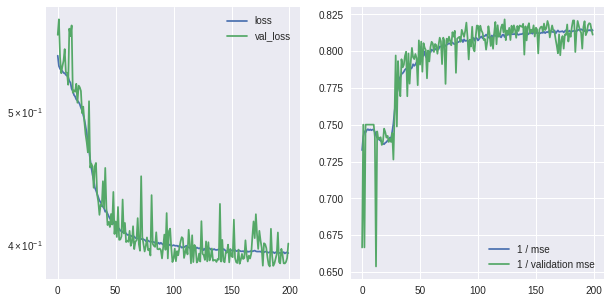

2019-08-07 15:06:26.553447: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2019-08-07 15:06:26.573143: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2808000000 Hz
2019-08-07 15:06:26.573915: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5632865e8f80 executing computations on platform Host. Devices:
2019-08-07 15:06:26.573950: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2019-08-07 15:06:26.662770: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a proper command-line flag, not via TF_XLA_FLAGS) 

In [7]:
# 
history = model.fit(x_train, y_train, epochs=200, batch_size=128,  verbose=1, validation_data=(x_test, y_test), callbacks = callbacks)